interp1d()函数:
```python
scipy.interpolate.interp1d(x, y, kind='linear', axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
```
参数:  

- x, y: ndarray数组
- kind: 插值方法{linear: 线性, nearest: 最近邻, nearest-up, previous, next; zero, slinear, quadratic, cubic: 一次到四次函数}
- axis: 插值的轴(默认y轴)

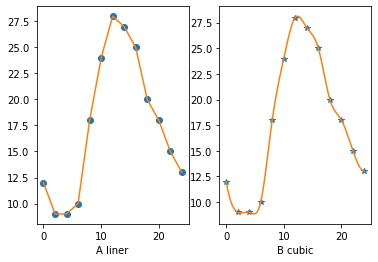

In [1]:
# 一维插值,page221
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 给定以下数据插值
x = np.arange(0, 25, 2)
y = np.array([12, 9, 9, 10, 18, 24, 28, 27, 25, 20, 18, 15, 13])
# 插值数据
xnew = np.linspace(0, 24, 500)

f1 = interp1d(x, y)
y1 = f1(xnew)

f2 = interp1d(x, y, 'cubic')
y2 = f2(xnew)

# 绘图
plt.subplot(121)
plt.plot(x, y, 'o')
plt.plot(xnew, y1)
plt.xlabel('A liner')

plt.subplot(122)
plt.plot(x, y, '*')
plt.plot(xnew, y2)
plt.xlabel('B cubic')

plt.show()

区域面积: 4782737.815311186


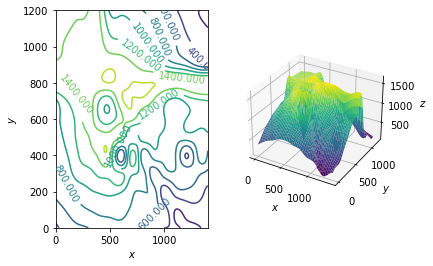

In [2]:
# 二维网格插值,page222
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.interpolate import interp2d
import pandas as pd

z = pd.read_csv('resours/data.txt')
# pandas读取默认为'str'类型
x = np.float64(z.columns.values)
y = np.float64(z.index.values)
z = z.values

# 返回一个函数
f = interp2d(x, y, z, 'cubic')

# 插值的数据
xn = np.linspace(0, 1400, 141)
yn = np.linspace(0, 1200, 121)
zn = f(xn, yn)

m = len(xn)
n = len(yn)
s = 0

for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1 = np.array([xn[i], yn[j], zn[j, i]])
        p2 = np.array([xn[i+1], yn[j], zn[j, i+1]])
        p3 = np.array([xn[i+1], yn[j+1], zn[j+1, i+1]])
        p4 = np.array([xn[i], yn[j+1], zn[j+1, i]])
        p12 = norm(p1 - p2)
        p23 = norm(p3 - p2)
        p13 = norm(p3 - p1)
        p14 = norm(p4 - p1)
        p34 = norm(p4 - p3)
        L1 = (p12 + p23 + p13) / 2
        s1 = np.sqrt(L1 * (L1-p12) * (L1-p23) * (L1-p13))
        L2 = (p13 + p14 + p34) / 2
        s2 = np.sqrt(L2 * (L2-p13) * (L2-p14) * (L2-p34))
        # 两个三角形面积相加
        s = s + s1 + s2
print('区域面积:',s)

plt.subplot(121)
contr = plt.contour(xn, yn, zn)
plt.clabel(contr)

plt.xlabel('$x$')
plt.ylabel('$y$', rotation=90)
X, Y = np.meshgrid(xn, yn)

ax = plt.subplot(122, projection='3d')
# 3d表面绘图
ax.plot_surface(X, Y, zn, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

data = pd.read_csv('resours/sea.txt', header=None, index_col=[0])
x = data.values[0]
y = data.values[1]
z = data.values[2]
points = np.array([x,y]).T   # 坐标值
values = z   # 散点值

xn = np.linspace(x.min(), x.max(), 100)
yn = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xn, yn)

# 该插值函数返回插值点，有些则返回一个函数
zi = griddata(points, values, (xi, yi), method='nearest') # xi,yi为需要插值的网格数据

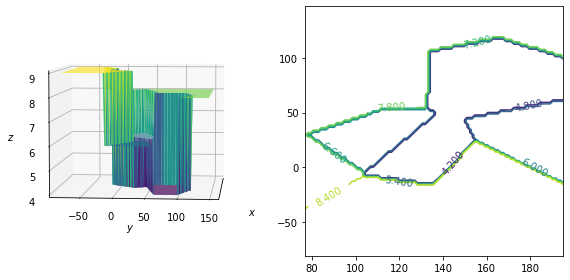

In [84]:
fig = plt.figure(figsize=(8,4)) # 拉长画布
ax = plt.subplot(121, projection='3d')
ax.plot_surface(xi, yi, z_after, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.xticks(())# 关闭x轴标签，否则数字会折叠 
ax.view_init(5, 5)
plt.subplot(122)
c = plt.contour(x_after, y_after, z_after, 8)
plt.clabel(c)
plt.tight_layout()
plt.show()